In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [143]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [144]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [145]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Feature Engineering

In [146]:
Male = pd.get_dummies(data['sex'], drop_first=True)
df = pd.concat([data, Male], axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [147]:
Smoker = pd.get_dummies(df['smoker'],drop_first=True)
df = pd.concat([df,Smoker],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [148]:
df.rename(columns={'yes': 'Smoker'}, inplace=True)

In [149]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [150]:
Region = pd.get_dummies(df['region'],drop_first=True)
df = pd.concat([df,Region],axis=1)
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


### Exploratory Analysis

In [151]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

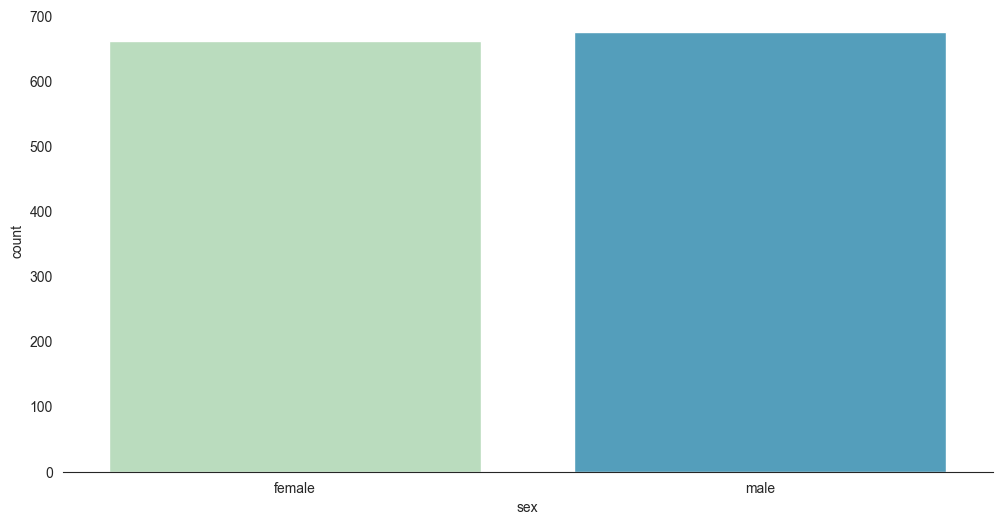

In [152]:
plt.figure(figsize=(12, 6))
sns.set_style("white")
sns.countplot(x="sex", data=df, palette="GnBu")
sns.despine(left=True)

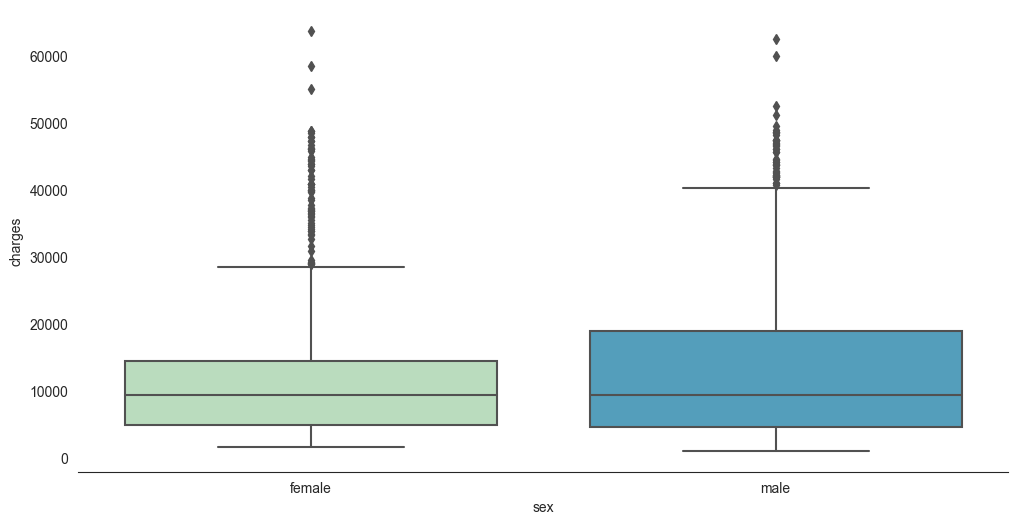

In [153]:
plt.figure(figsize=(12, 6))
sns.set_style("white")
sns.boxplot(x="sex", y='charges', data=df, palette="GnBu")
sns.despine(left=True)

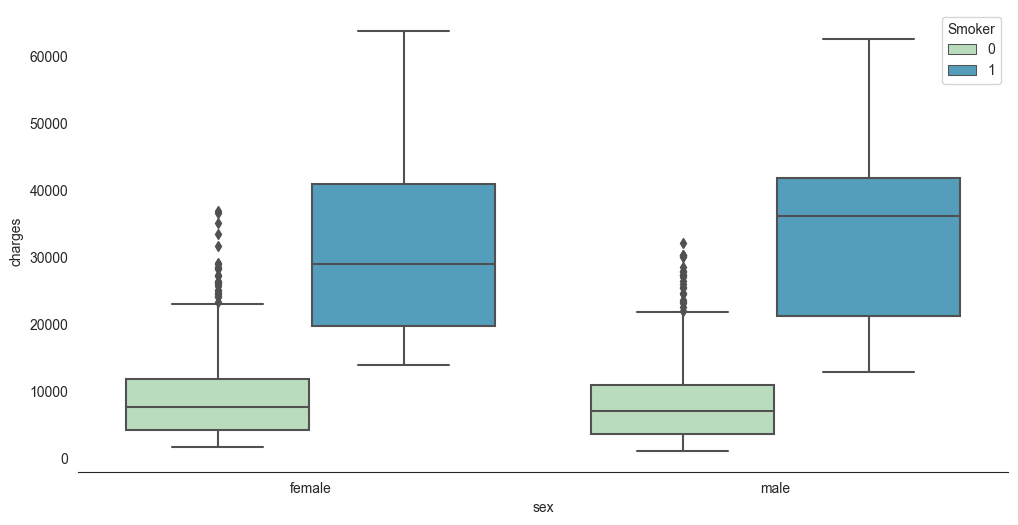

In [154]:
plt.figure(figsize=(12, 6))
sns.set_style("white")
sns.boxplot(x="sex", y='charges', hue='Smoker', data=df, palette="GnBu")
sns.despine(left=True)

<AxesSubplot: xlabel='age', ylabel='charges'>

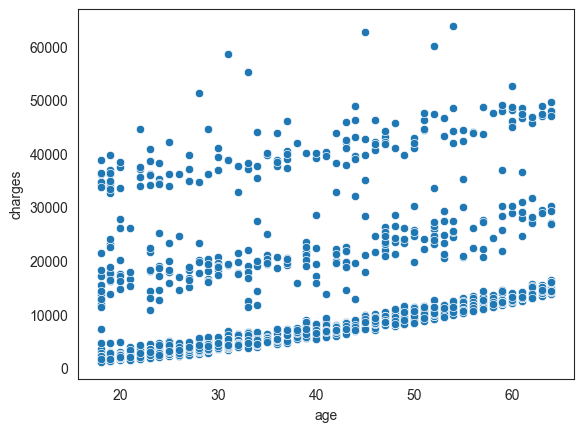

In [155]:
sns.scatterplot(x = 'age', y='charges', data = df)

<AxesSubplot: xlabel='age', ylabel='charges'>

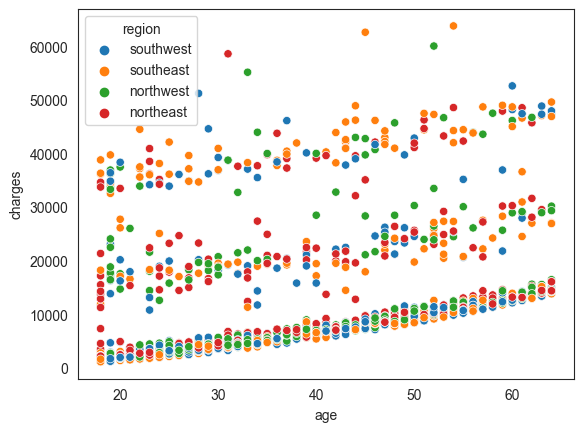

In [156]:
sns.scatterplot(x = 'age', y='charges', data = df, hue = 'region')

<AxesSubplot: xlabel='age', ylabel='charges'>

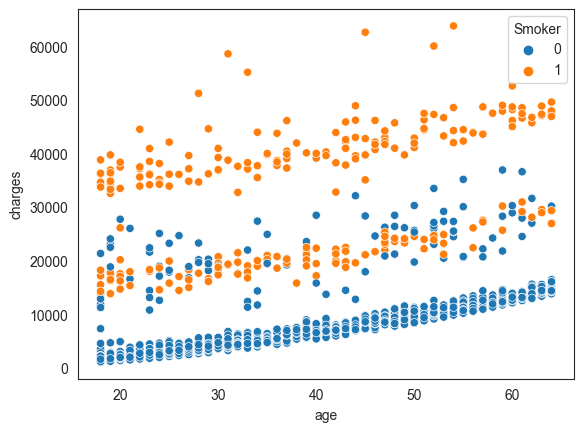

In [157]:
sns.scatterplot(x = 'age', y='charges', data = df, hue = 'Smoker')

<AxesSubplot: xlabel='bmi', ylabel='charges'>

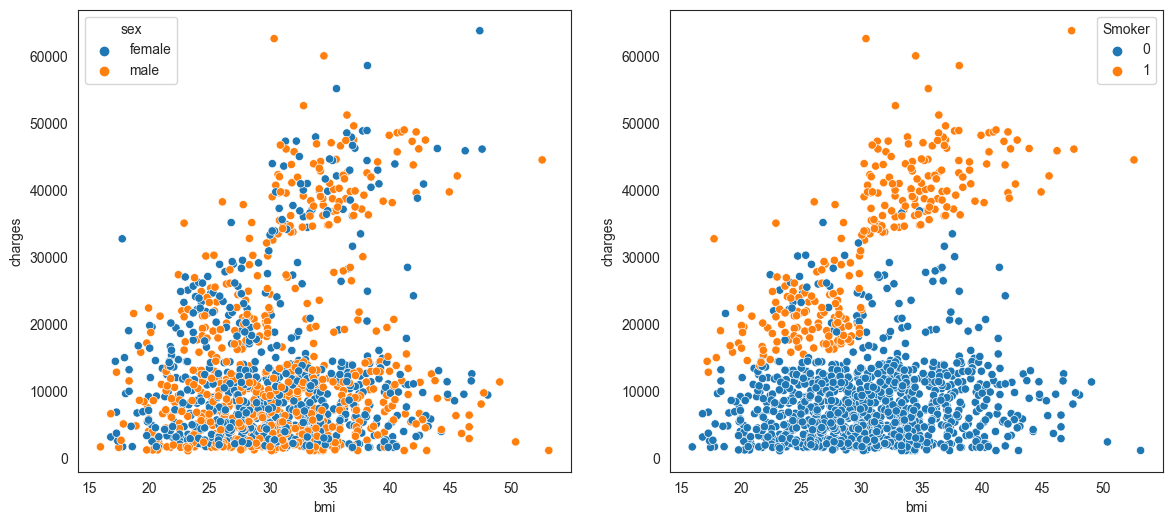

In [158]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(14,6))
sns.scatterplot(x = 'bmi', y='charges', data = df, hue = 'sex', ax=ax[0])
sns.scatterplot(x = 'bmi', y='charges', data = df, hue = 'Smoker', ax=ax[1])

In [159]:
df.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [160]:
df.drop(['sex','smoker','region'], axis=1, inplace=True)

In [161]:
df.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


<AxesSubplot: >

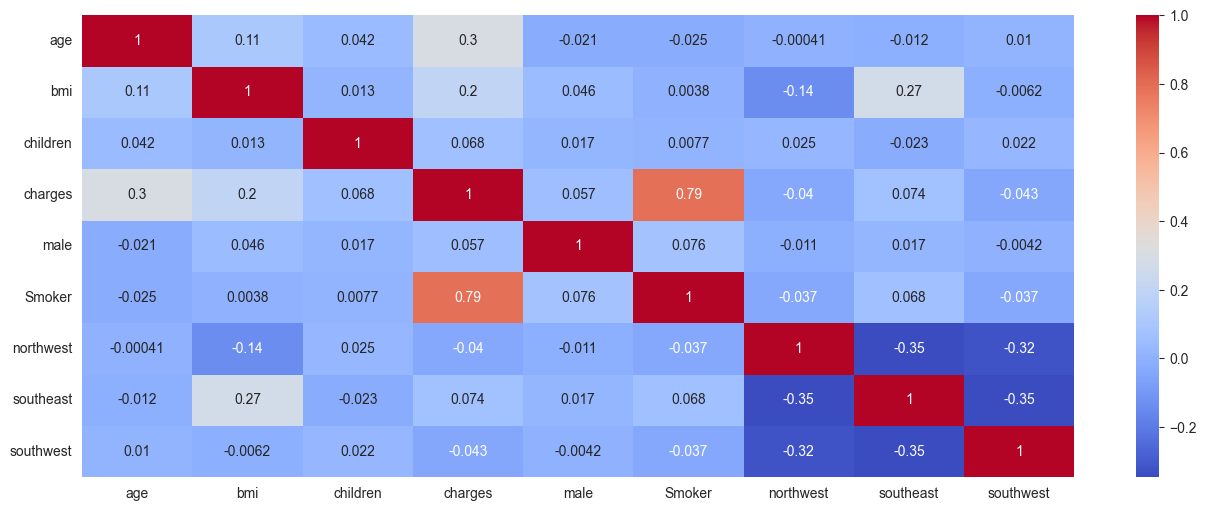

In [162]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

### Splitting the data

In [163]:
x = df.drop('charges',axis=1)
y = df['charges']

In [164]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.4)

In [165]:
print(x_train.shape)
print(x_test.shape)

(802, 8)
(536, 8)


### Scaling the data

In [166]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train) # this is done because without it, the model will be biased towards the features with higher values
scaled_x_test = scaler.transform(x_test)

Support Vector Regression

In [167]:
from sklearn.svm import SVR

regressor = SVR()
regressor.fit(scaled_x_train, y_train)

SVR()

In [168]:
predict = regressor.predict(scaled_x_test)
predict.shape

(536,)

Text(0.5, 0, 'Predict')

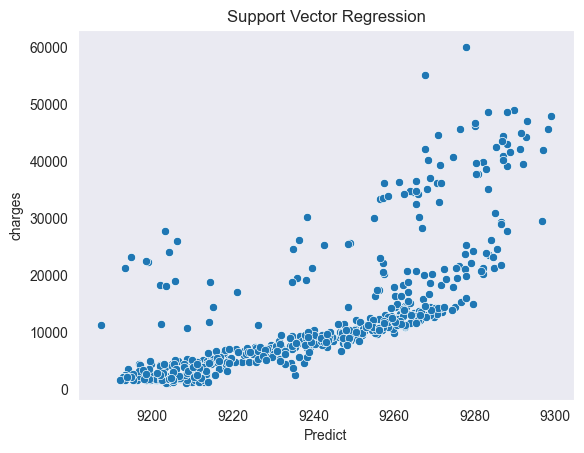

In [169]:
sns.set_style('dark')
f = sns.scatterplot(x = predict,y = y_test)
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')

In [170]:
df = pd.concat([df['Smoker'],df['bmi'],df['age'],df['charges']],axis=1)
df.head()

,Smoker,bmi,age,charges
0,1,27.900,19,16884.92400
1,0,33.770,18,1725.55230
2,0,33.000,28,4449.46200
3,0,22.705,33,21984.47061
4,0,28.880,32,3866.85520


In [171]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.4)
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)
regressor = SVR()
regressor.fit(scaled_x_train, y_train)
predict = regressor.predict(scaled_x_test)

Text(0.5, 0, 'Predict')

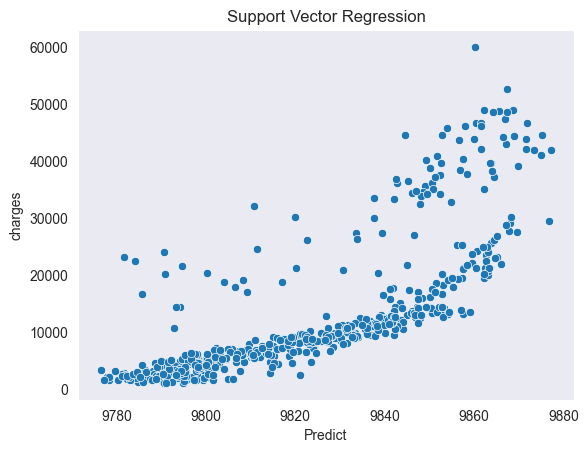

In [172]:
sns.set_style('dark')
f = sns.scatterplot(x = predict,y = y_test)
f.set_title('Support Vector Regression')
f.set_xlabel('Predict')